In [1]:
%pip install pandas
%pip install transformers
%pip install numpy
%pip install torch torchvision torchaudio
%pip install contractions

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [28]:
import pandas as pd
import contractions
from transformers import BertTokenizer
import seaborn as sb
import numpy as np
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
import re
import itertools
import ast

In [27]:
def contains_slang(text, slang_dict):
    if not isinstance(text, str):
        return text
    words = text.split()
    return [word.lower() for word in words if word.lower() in slang_dict]

def replace_slang(text, slang_dict):
    if not isinstance(text, str):
        return text
    # Split the text into words
    words = text.split()
    
    # Replace slang words using the dictionary
    replaced_text = ' '.join([slang_dict.get(word.lower(), word) for word in words])
    
    return replaced_text

def expand_contractions(text):
  return contractions.fix(text)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_text(text):

    encoded_input = tokenizer(text, truncation=True, padding=True, return_tensors="pt")
    tokens = str(encoded_input['input_ids'].numpy().tolist())
    return tokens

In [4]:
def word_to_token(text):

    if pd.isna(text):
        return ""

    slang_dict = {
        "brb": "be right back",
        "lol": "laugh out loud",
        "omg": "oh my god",
        "cuz": "because",
        "smh": "shaking my head",
        "cus": "because",
        "sic": "sick",
        "kinda": "kind of",
        "wanna": "want to",
        "gotta": "got to",
        "fyi": "for your information",
        "outta": "out of",
        "bff": "best friend forever"
    }

    # Check for any slangs detected.
    if contains_slang(text, slang_dict):
        text = replace_slang(text, slang_dict)
    
    # Expands contratctions
    text = expand_contractions(text)

    # Uses BERT tokenization to preprocess the text
    text = preprocess_text(text)

    return text

In [5]:
#Test to see if slang detection/replacement, contraction expansion, and bert tokenization works.

print(word_to_token("Hello lol i love information retrieval cuz isn't it the coolest subject?"))

[[101, 7592, 4756, 2041, 5189, 1045, 2293, 2592, 26384, 2138, 2003, 2025, 2009, 1996, 4658, 4355, 3395, 1029, 102]]


In [6]:
df = pd.read_csv('../crawling/cleaned_file.csv', dtype={'id': str}, encoding='latin-1')
df.head()

,topic,title,source,article_link,article,sentiments
0,Microsoft,The Top 7 Tech Stocks to Buy in March 2024,InvestorPlace,https://investorplace.com/2024/03/the-top-7-te...,Microsoft (MSFT) is still growing at a fast pa...,positive
1,Microsoft,Microsoft-owned LinkedIn makes this 'first-eve...,Times of India,https://timesofindia.indiatimes.com/gadgets-ne...,Microsoft-owned LinkedIn generated $1.7 billio...,positive
2,Microsoft,Microsoft debuts Copilot for finance pros,Computerworld,https://www.computerworld.com/article/3714142/...,Microsoft has launched a Copilot assistant for...,neutral
3,Microsoft,Microsoft's Path to Becoming the Largest Compa...,The Motley Fool,https://www.fool.com/investing/2024/03/06/micr...,Microsoft's Path to Becoming the Largest Compa...,positive
4,Microsoft,Top Analyst Brad Reback Weighs in on Microsoft...,Tipranks,https://www.tipranks.com/news/top-analyst-brad...,Non-deal roadshows (NDRs) allow institutional ...,positive


In [7]:
df.iloc[1]['article']

"Microsoft-owned LinkedIn generated $1.7 billion in 2023 from its premium subscription service. The service offers AI tools for job seekers and users at $39.99/month. The number of premium subscribers increased by 25%. Due to economic uncertainty, individuals are taking steps to ensure they have the best possible opportunities to secure their desired jobs. LinkedIn has disclosed sales figures for its premium subscription service for the first time. The company's AI tools include the ability to analyze job postings and suggest suitability based on a user's resume, assist with profile optimization for recruiters, and automatically generate messages for job applications. Last year, LinkedIn laid off around 1,400 people in two rounds. The company is also focused on expanding its premium subscription service. Additional Notes: The text has been cleaned up by removing non-article elements, such as advertisements, disclaimers, and promotional content. The text has been preserved as closely as

In [8]:
df['processed_article'] = df['article'].apply(word_to_token)

In [9]:
df

,topic,title,source,article_link,article,sentiments,processed_article
0,Microsoft,The Top 7 Tech Stocks to Buy in March 2024,InvestorPlace,https://investorplace.com/2024/03/the-top-7-te...,Microsoft (MSFT) is still growing at a fast pa...,positive,"[[101, 7513, 1006, 5796, 6199, 1007, 2003, 214..."
1,Microsoft,Microsoft-owned LinkedIn makes this 'first-eve...,Times of India,https://timesofindia.indiatimes.com/gadgets-ne...,Microsoft-owned LinkedIn generated $1.7 billio...,positive,"[[101, 7513, 1011, 3079, 5799, 2378, 7013, 100..."
2,Microsoft,Microsoft debuts Copilot for finance pros,Computerworld,https://www.computerworld.com/article/3714142/...,Microsoft has launched a Copilot assistant for...,neutral,"[[101, 7513, 2038, 3390, 1037, 8872, 22360, 21..."
3,Microsoft,Microsoft's Path to Becoming the Largest Compa...,The Motley Fool,https://www.fool.com/investing/2024/03/06/micr...,Microsoft's Path to Becoming the Largest Compa...,positive,"[[101, 7513, 1005, 1055, 4130, 2000, 3352, 199..."
4,Microsoft,Top Analyst Brad Reback Weighs in on Microsoft...,Tipranks,https://www.tipranks.com/news/top-analyst-brad...,Non-deal roadshows (NDRs) allow institutional ...,positive,"[[101, 2512, 1011, 3066, 4925, 14406, 2015, 10..."
...,...,...,...,...,...,...,...
10856,Crowdstrike Holdings,CrowdStrike (CRWD) Q4 Earnings Report Preview:...,Yahoo Finance,https://finance.yahoo.com/news/crowdstrike-crw...,"In this article, CrowdStrike (NASDAQ:CRWD) wil...",positive,"[[101, 1999, 2023, 3720, 1010, 12783, 18886, 3..."
10857,Crowdstrike Holdings,CRWD Stock Earnings: CrowdStrike Holdings Beat...,InvestorPlace,https://investorplace.com/earning-results/2024...,CrowdStrike Holdings (NASDAQ: CRWD) just repor...,neutral,"[[101, 12783, 18886, 3489, 9583, 1006, 17235, ..."
10858,Crowdstrike Holdings,"Insider Selling: CrowdStrike Holdings, Inc. (N...",Defense World,https://www.defenseworld.net/2024/03/24/inside...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) Presi...",negative,"[[101, 12783, 18886, 3489, 9583, 1010, 4297, 1..."
10859,Crowdstrike Holdings,CrowdStrike (NASDAQ:CRWD) Shares Down 0.2% on ...,MarketBeat,https://www.marketbeat.com/instant-alerts/nasd...,"CrowdStrike Holdings, Inc. (NASDAQ:CRWD) share...",negative,"[[101, 12783, 18886, 3489, 9583, 1010, 4297, 1..."


In [10]:
df.to_csv('preprocessed_data.csv',index = False)

sentiments
positive    4567
neutral     3346
negative    2948
Name: count, dtype: int64


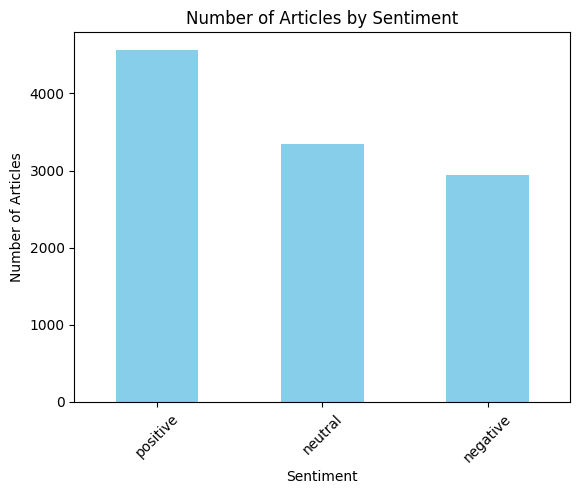

In [11]:
# Count the total number of articles for each sentiment

sentiment_counts = df['sentiments'].value_counts()

print(sentiment_counts)

sentiment_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Articles by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

Error processing : unexpected EOF while parsing (<unknown>, line 0)


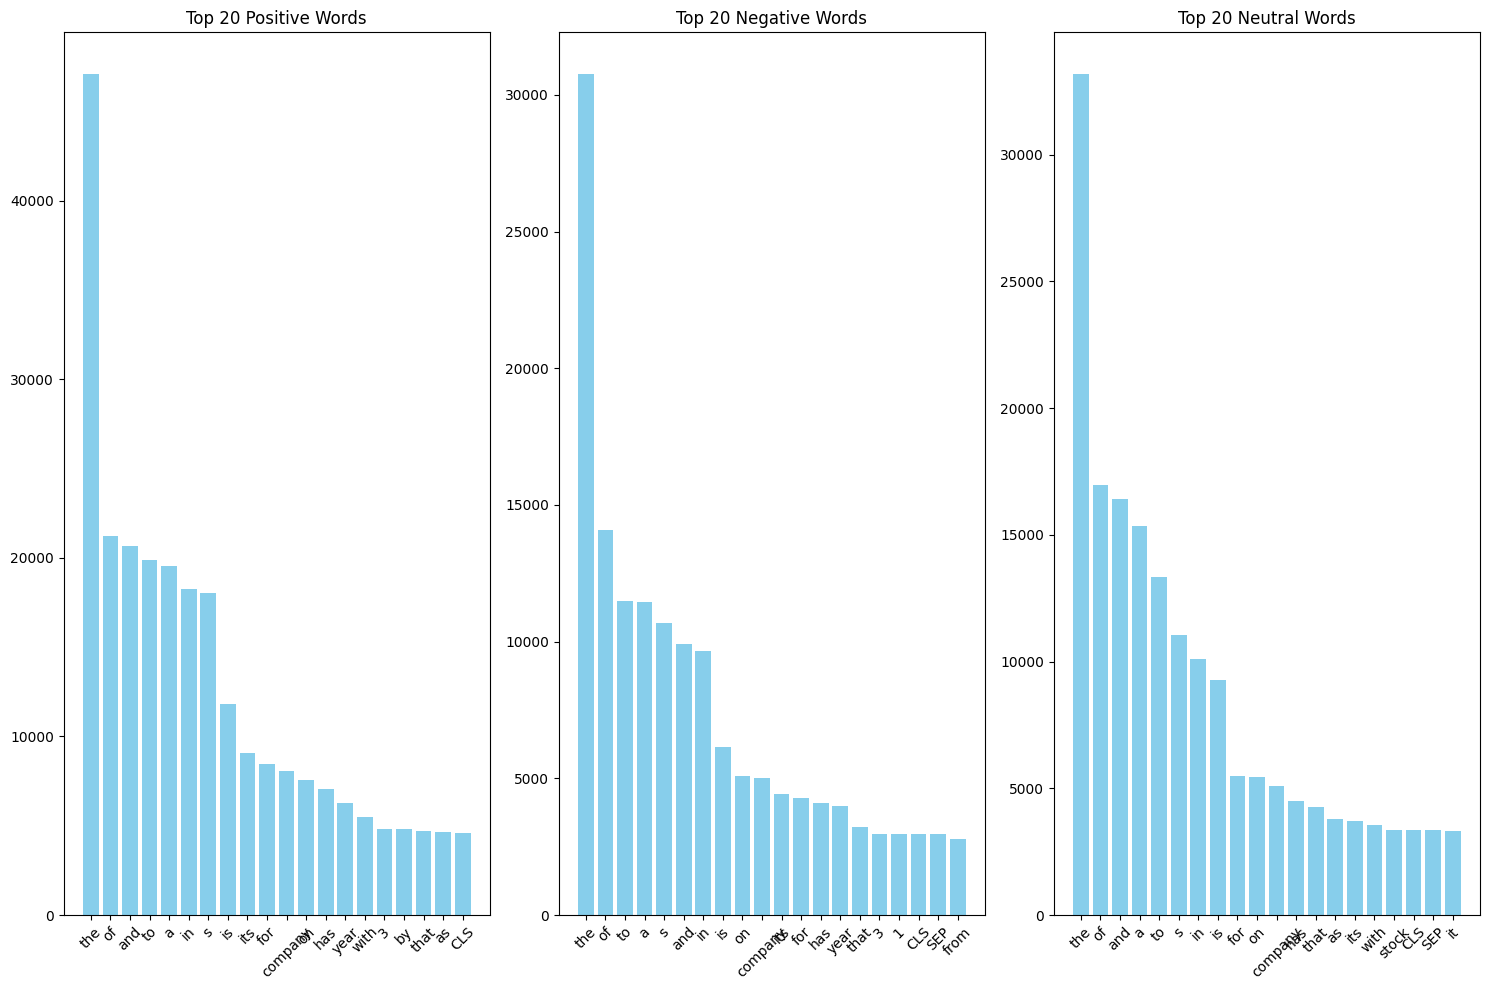

In [33]:
# Find the top 20 positive, negative, and neutral words

word_counts = Counter()

def tokens_to_words(token_ids):
    try:
        tokens = ast.literal_eval(token_ids)
        token_ids = list(itertools.chain.from_iterable(tokens))
        tokens = tokenizer.convert_ids_to_tokens(token_ids)
        return tokens
    except Exception as e:
        print(f"Error processing {token_ids}: {e}")  # Log any errors
        return []

# Identify the top words for each sentiment
positive_texts = df[df['sentiments'] == 'positive']['processed_article'].apply(tokens_to_words)
negative_texts = df[df['sentiments'] == 'negative']['processed_article'].apply(tokens_to_words)
neutral_texts = df[df['sentiments'] == 'neutral']['processed_article'].apply(tokens_to_words)

def remove_special_characters(token):
    pattern = r'[^a-zA-Z0-9 ]'
    clean_token = re.sub(pattern, '', token)
    return clean_token

def aggregate_and_count(tokens_series):
    all_tokens = [remove_special_characters(token) for tokens_list in tokens_series for token in tokens_list]
    all_tokens = [token for token in all_tokens if token]
    return Counter(all_tokens)

# Aggregate and count for each sentiment
positive_word_counts = aggregate_and_count(positive_texts)
negative_word_counts = aggregate_and_count(negative_texts)
neutral_word_counts = aggregate_and_count(neutral_texts)

top_20_positive = positive_word_counts.most_common(20)
top_20_negative = negative_word_counts.most_common(20)
top_20_neutral = neutral_word_counts.most_common(20)

def plot_top_words(top_words, title, subplot_index):
    words, frequencies = zip(*top_words)
    plt.subplot(subplot_index)
    plt.bar(words, frequencies, color='skyblue')
    plt.title(title)
    plt.xticks(rotation=45)

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Plotting each sentiment's top words
plot_top_words(top_20_positive, 'Top 20 Positive Words', 131)
plot_top_words(top_20_negative, 'Top 20 Negative Words', 132)
plot_top_words(top_20_neutral, 'Top 20 Neutral Words', 133)

plt.tight_layout()
plt.show()